# Aktivitätsbezogene Analysen

Das studentische Verhalten wird nachfolgend bezüglich ausgeführten Aktivitäten betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [59]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [60]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Herstellung der Verbindung zur MySQL-Datenbank

In [61]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Selektion auf Studenten**

In [62]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student' OR relateduserstatus = 'student'"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332762,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
332763,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
332764,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 21:13:25,,0
332765,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


### Unterscheidung von Lern- und Kommunikationsverhalten

&nbsp;
**Log-Einträge pro Student**

In [63]:
# In der Auswahl enthalten sind nur Studenten, die selbst eine Aktivität initiiert haben.
users = moodle_data.userid[moodle_data.userstatus == 'student'].groupby(moodle_data.userid).count()
display(users)

userid
1      3865
13     4330
18     1978
19     5823
20     5909
       ... 
131    3748
132    2973
134    4629
136      33
143    1387
Name: userid, Length: 69, dtype: int64

&nbsp;
**Log-Einträge pro Objecttable**

In [64]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                               124715
assign                          15215
assign_grades                    3049
assign_submission                2605
assignsubmission_file            1166
assignsubmission_onlinetext        35
bigbluebuttonbn                  2449
chat                              185
chat_messages                      20
choice                           1336
choice_answers                    174
comments                           78
course                            892
course_categories                 315
course_modules_completion        6581
data                              539
data_records                       72
etherpad                          844
event                             336
feedback                          206
feedback_completed                134
folder                           1220
forum                           12144
forum_discussion_subs            1786
forum_discussions               15093
forum_posts                      3615


&nbsp;
**Objecttables pro Student und Studiengang**

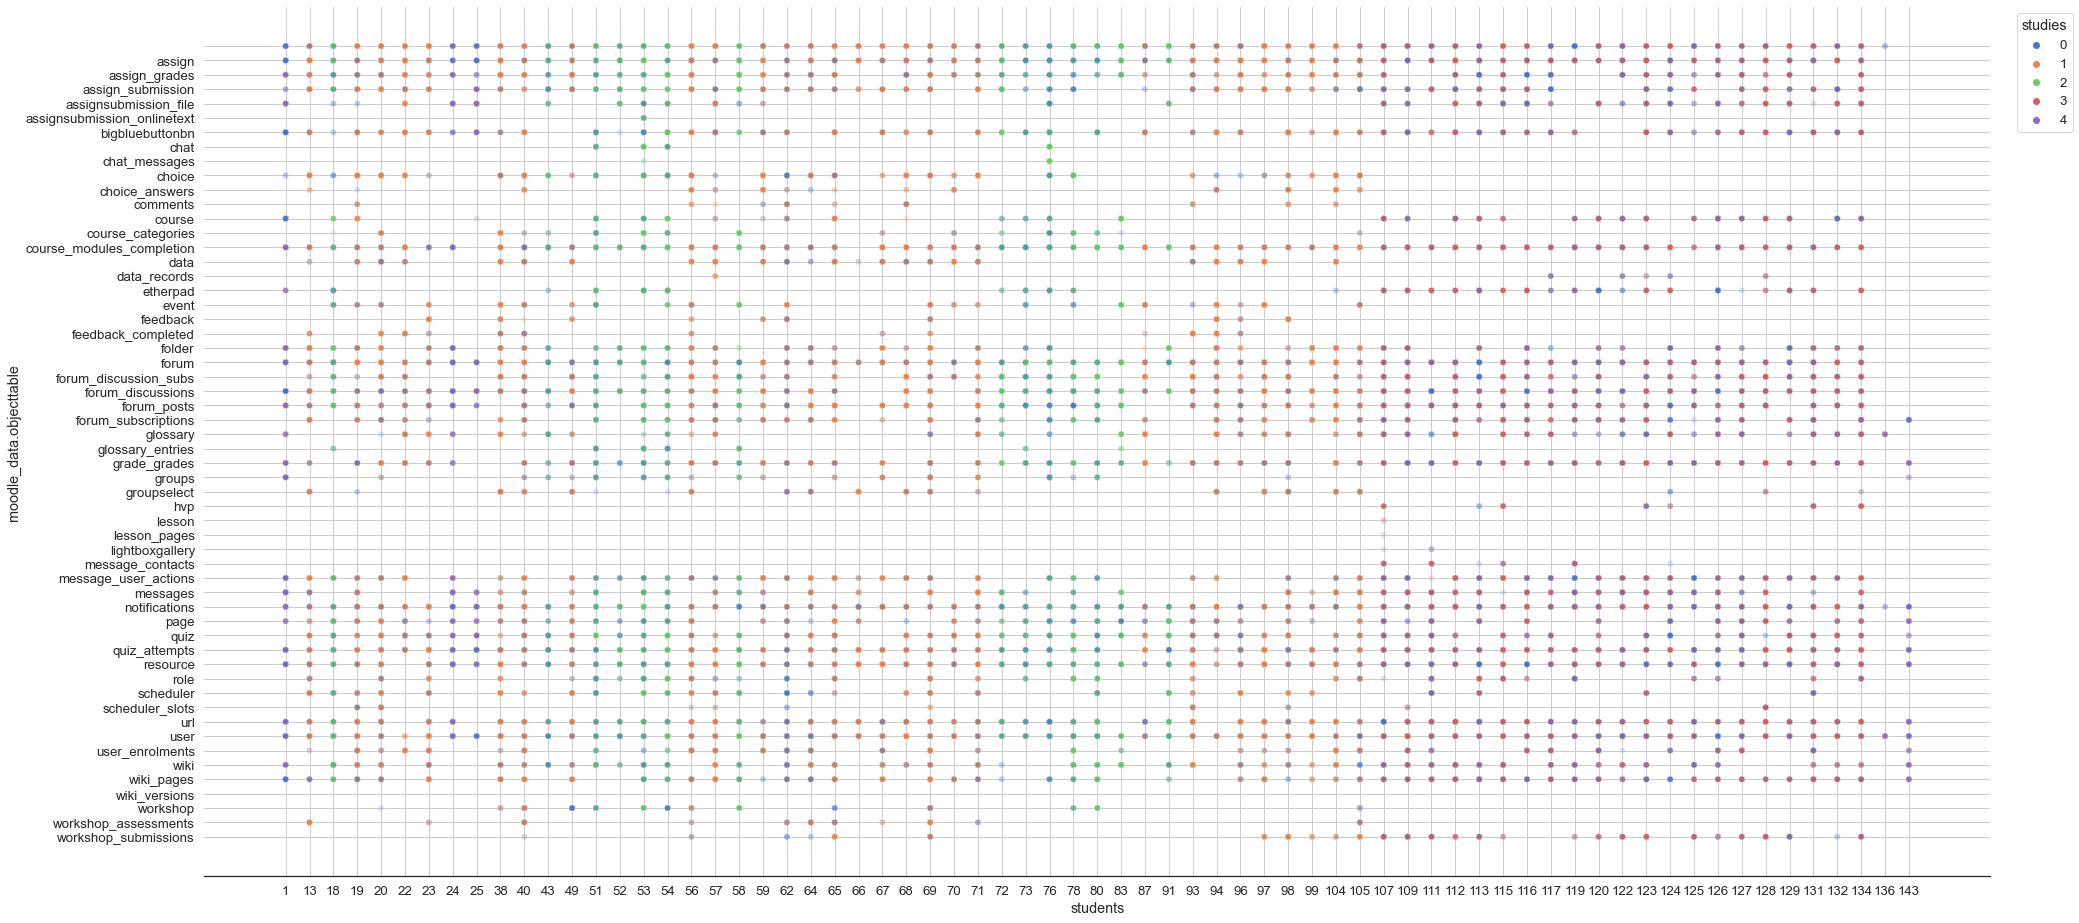

In [65]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 16)) # Größe der Visualisierung (in inch)

# Visualisierung der Objecttable pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data.userid[moodle_data.userstatus == 'student'].astype(str), y=moodle_data.sort_values(by='objecttable', ignore_index=True).objecttable, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.objecttable')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

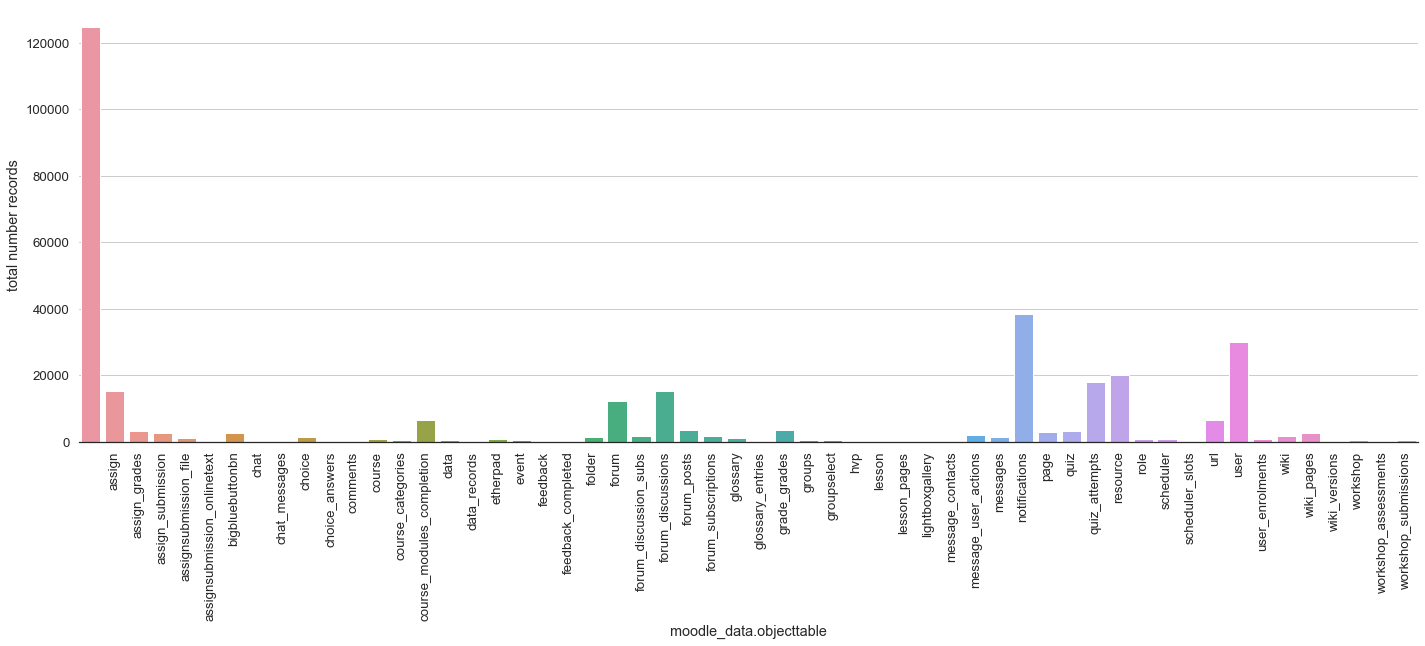

In [66]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.countplot(x=moodle_data.sort_values(by='objecttable', ignore_index=True).objecttable)
# chart = sns.countplot(x=moodle_data_students.objecttable, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Objecttables pro Student und Studiengang mit Personenbezug**

In [67]:
# Auswahl der Datensätze mit Personenbezug
moodle_data_related = moodle_data[moodle_data.relateduserid != 0]
moodle_data_related

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332753,28512,3,109,student,109,student,updated,\core\event\course_module_completion_updated,course_modules_completion,74802,2021-06-03 20:16:13,,0
332755,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 20:37:02,,0
332760,28512,3,109,student,109,student,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
332762,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0


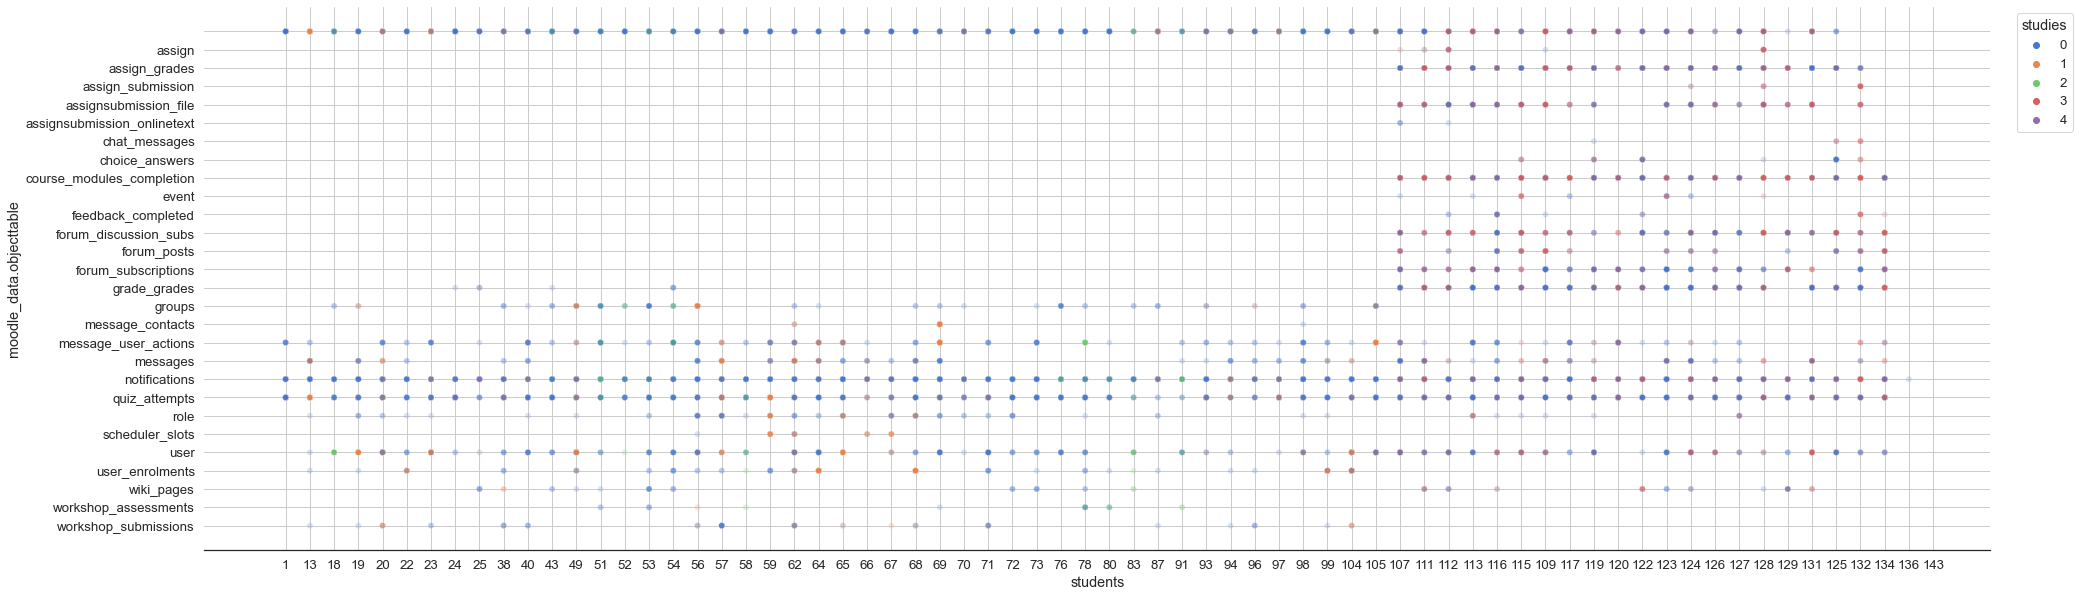

In [68]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 10)) # Größe der Visualisierung (in inch)

# Visualisierung der Objecttable pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data_related.userid[moodle_data_related.userstatus == 'student'].astype(str), y=moodle_data_related.sort_values(by='objecttable', ignore_index=True).objecttable, hue=moodle_data_related.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.objecttable')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

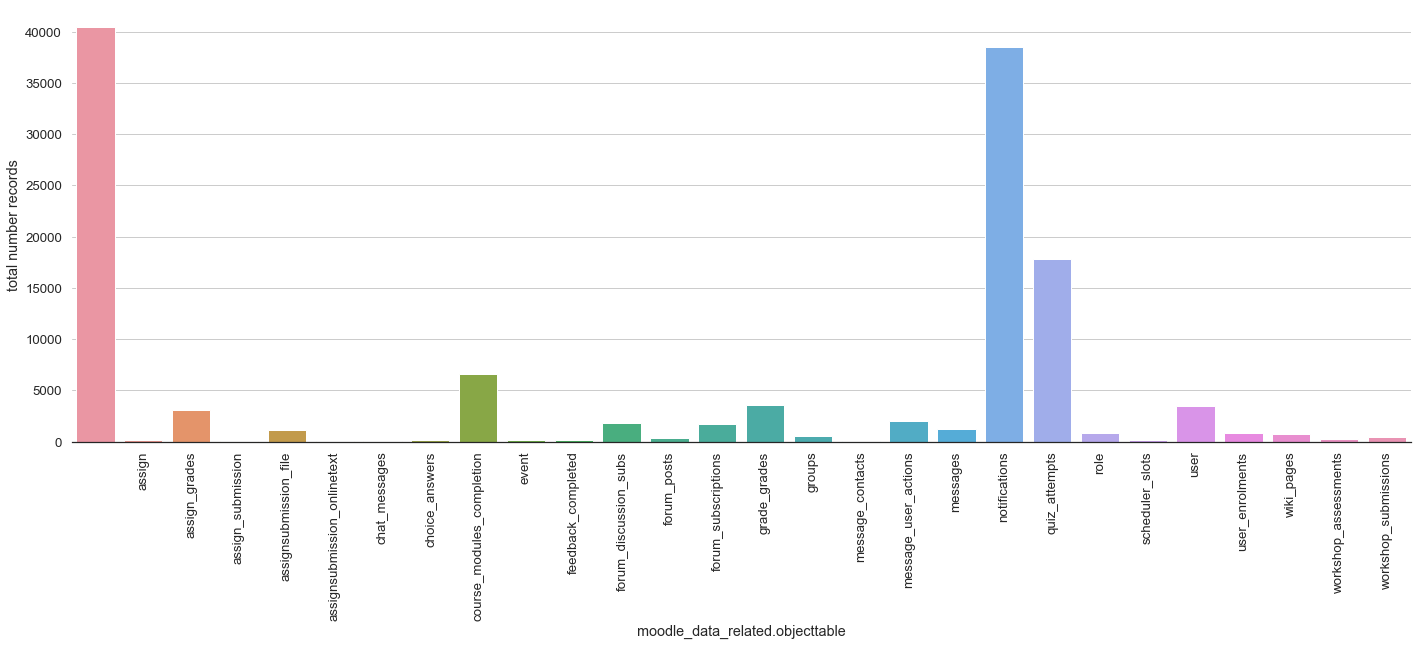

In [69]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable mit Personenbezug
chart = sns.countplot(x=moodle_data_related.sort_values(by='objecttable', ignore_index=True).objecttable)
# chart = sns.countplot(x=moodle_data_students.objecttable, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data_related.objecttable')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Objecttables pro Student und Studiengang ohne Personenbezug**

In [70]:
# Auswahl der Datensätze ohne Personenbezug
moodle_data_not_related = moodle_data[moodle_data.relateduserid == 0]
moodle_data_not_related

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
1294,0,0,1,student,0,other,loggedin,\core\event\user_loggedin,user,38342,2020-10-12 03:54:58,,0
1296,27583,4,1,student,0,other,viewed,\core\event\course_viewed,,0,2020-10-12 03:55:03,,0
1297,27583,4,1,student,0,other,viewed,\mod_forum\event\course_module_viewed,forum,120548,2020-10-12 03:55:06,,0
1298,27583,4,1,student,0,other,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318592,2020-10-12 03:55:19,,0
1299,27583,4,1,student,0,other,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 04:03:42,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332759,28512,3,109,student,0,other,created,\mod_forum\event\discussion_created,forum_discussions,335209,2021-06-03 21:11:23,,0
332761,28512,3,109,student,0,other,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
332763,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
332765,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


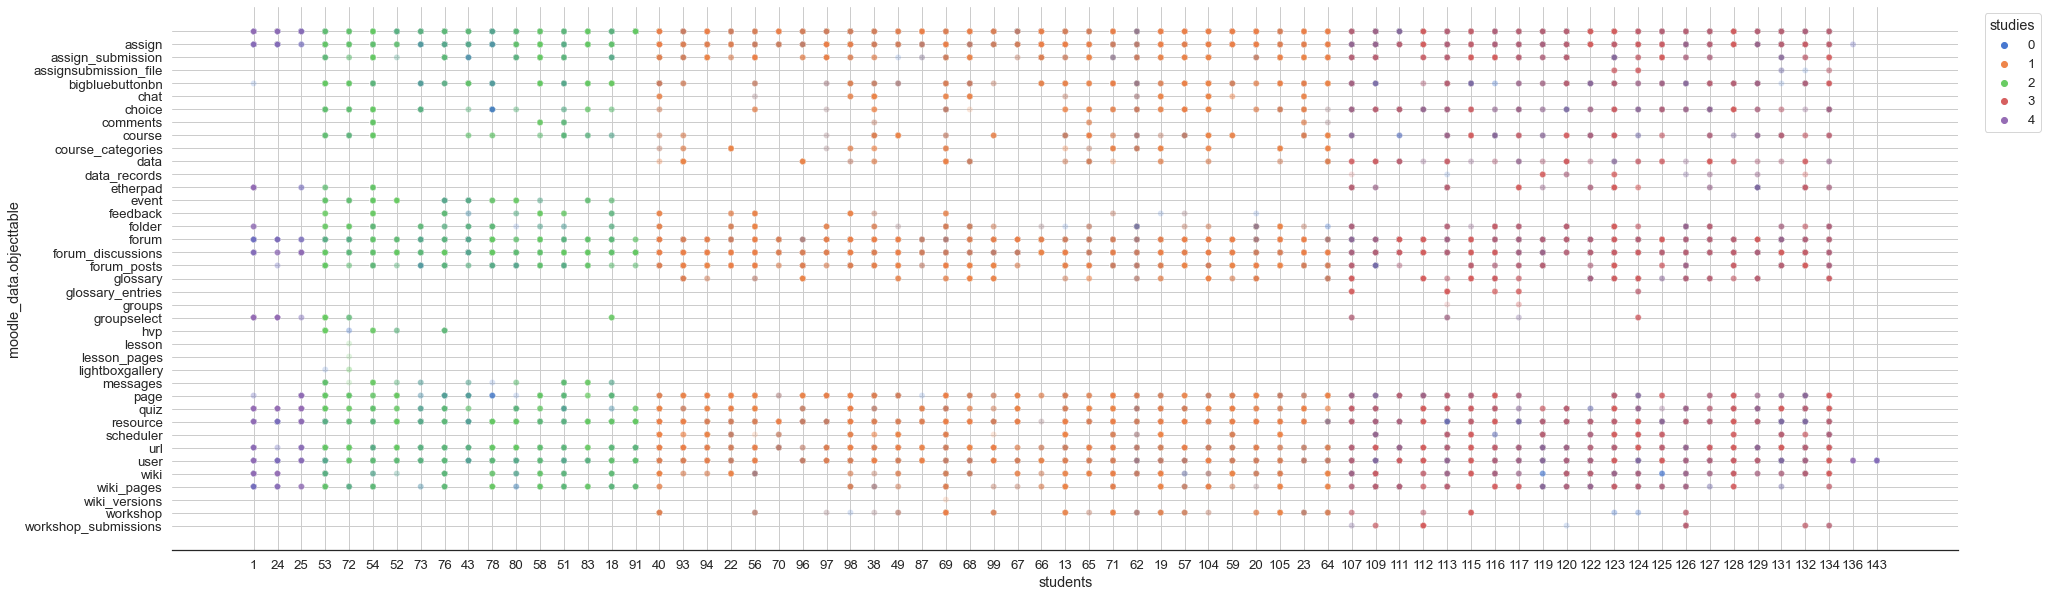

In [71]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 10)) # Größe der Visualisierung (in inch)

# Visualisierung der Objecttable pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data_not_related.userid[moodle_data_not_related.userstatus == 'student'].astype(str), y=moodle_data_not_related.sort_values(by='objecttable', ignore_index=True).objecttable, hue=moodle_data_not_related.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.objecttable')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

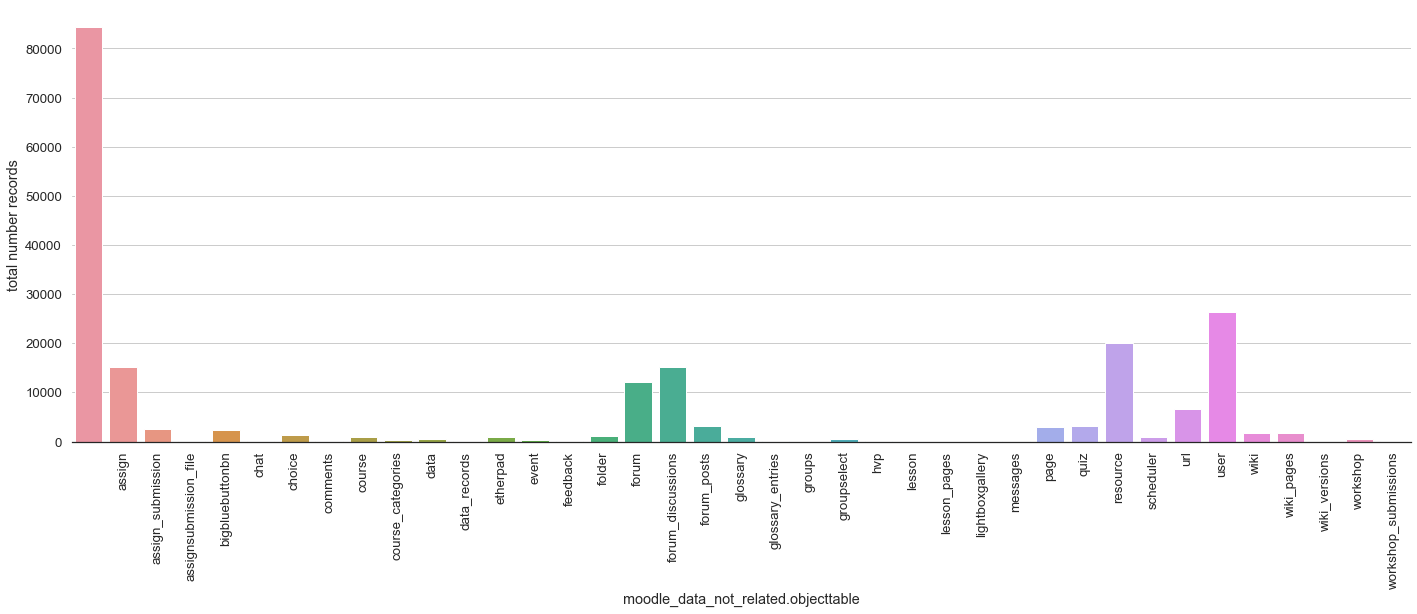

In [72]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Objecttable ohne Personenbezug
chart = sns.countplot(x=moodle_data_not_related.sort_values(by='objecttable', ignore_index=True).objecttable)
# chart = sns.countplot(x=moodle_data_students.objecttable, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data_not_related.objecttable')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Erstellung eines kombinierten Datensets für Objecttables mit und ohne Personenbezug**

In [73]:
# Ermittlung der Menge der Log-Einträge pro Objecttable mit Personenbezug
related_objecttables = moodle_data_related.objecttable.groupby(moodle_data_related.objecttable).count()
display(related_objecttables)

objecttable
                               40417
assign                           127
assign_grades                   3049
assign_submission                 57
assignsubmission_file           1131
assignsubmission_onlinetext       35
chat_messages                     20
choice_answers                   174
course_modules_completion       6581
event                            114
feedback_completed               134
forum_discussion_subs           1786
forum_posts                      387
forum_subscriptions             1733
grade_grades                    3538
groups                           565
message_contacts                  68
message_user_actions            2043
messages                        1255
notifications                  38510
quiz_attempts                  17785
role                             811
scheduler_slots                  110
user                            3486
user_enrolments                  811
wiki_pages                       700
workshop_assessments      

In [74]:
# Ermittlung der Menge der Log-Einträge pro Objecttable ohne Personenbezug
not_related_objecttables = moodle_data_not_related.objecttable.groupby(moodle_data_not_related.objecttable).count()
display(not_related_objecttables)

objecttable
                         84298
assign                   15088
assign_submission         2548
assignsubmission_file       35
bigbluebuttonbn           2449
chat                       185
choice                    1336
comments                    78
course                     892
course_categories          315
data                       539
data_records                72
etherpad                   844
event                      222
feedback                   206
folder                    1220
forum                    12144
forum_discussions        15093
forum_posts               3228
glossary                   920
glossary_entries           141
groups                       5
groupselect                471
hvp                         88
lesson                       2
lesson_pages                 1
lightboxgallery              4
messages                   176
page                      2878
quiz                      3198
resource                 20099
scheduler                  

In [75]:
# Erstellung eines kombinierten Datensets für Objecttables mit und ohne Personenbezug
users_objecttables = pd.concat([related_objecttables, not_related_objecttables], axis=1, keys=['related', 'not related']).sort_index()

# Ersetzung von NaN-Werten durch den Wert 0
users_objecttables = users_objecttables.fillna(0)

# Ausgabe des kombinierten Datensets
display(users_objecttables)

,related,not related
objecttable,,
,40417.0,84298.0
assign,127.0,15088.0
assign_grades,3049.0,0.0
assign_submission,57.0,2548.0
assignsubmission_file,1131.0,35.0
assignsubmission_onlinetext,35.0,0.0
bigbluebuttonbn,0.0,2449.0
chat,0.0,185.0
chat_messages,20.0,0.0


&nbsp;
**Visualisierung des kombinierten Datensets für Objecttables mit und ohne Personenbezug**

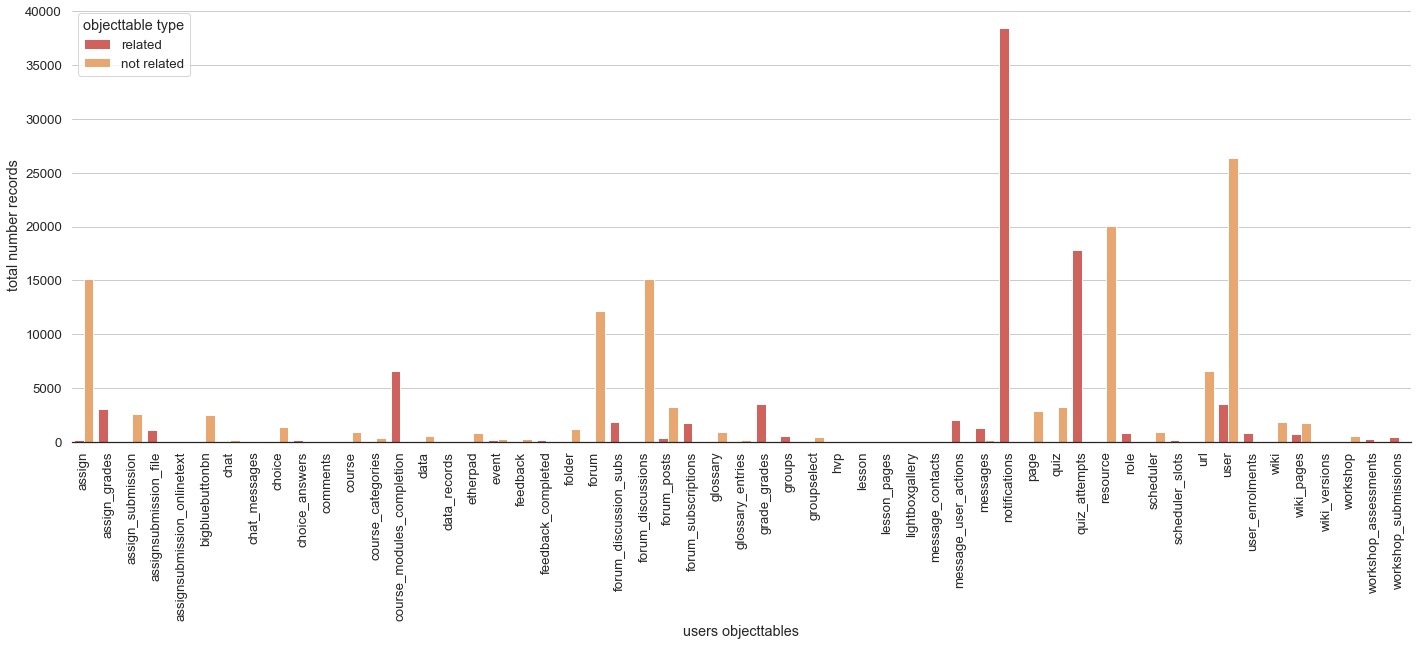

In [76]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Entfernung der ersten Zeile betreffend die objecttables ohne Werte,
# um Differenzen anderer Werte besser visualisieren zu können.
users_objecttables = users_objecttables[1:]

# Visualisierung der Menge der Log-Einträge pro Objecttable mit und ohne Personenbezug
result = users_objecttables.stack().reset_index().set_index('objecttable').rename(columns={'level_1': 'related', 0: 'not related'})
chart = sns.barplot(x=result.index, y='not related', data=result, hue='related')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('users objecttables')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 5500, 500))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='objecttable type')
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Aktivitaet_und_Benutzergruppe.pdf', format='pdf')
plt.show()